# Financial Data Analysis with Python - a Deep Dive

## Installing required Libraries/Packages

pip install yfinance

(first: conda update anaconda) 

## Loading Financial Data from the Web

In [ ]:
import pandas as pd
import yfinance as yf

In [ ]:
start = "2014-10-01"
end = "2021-05-31"

In [ ]:
symbol = "BA"

Note: From yfinance version 0.2.48, loading one symbol with yf.download() will lead to a Multi Level Index. <br>
To avoid this, set multi_level_index=False 

In [ ]:
yf.__version__ # check your version

In [ ]:
df = yf.download(symbol, start, end) # creates a Multi Level Index (from yfinance 0.2.48)
df

In [ ]:
df = yf.download(symbol, start, end, multi_level_index=False) # avoids Multi Level Index (from yfinance 0.2.48)
df

In [ ]:
df.info()

In [ ]:
symbol = ["BA", "MSFT", "^DJI", "EURUSD=X", "GC=F", "BTC-USD"]

Ticker Symbols: <br>
- __BA__: Boeing (US Stock) 
- __MSFT__: Microsoft Corp (US Stock)
- __^DJI__: Dow Jones Industrial Average (US Stock Index)
- __EURUSD=X__: Exchange Rate for Currency Pair EUR/USD (Forex)
- __GC=F__: Gold Price (Precious Metal / Commodity)
- __BTC-USD__: Bitcoin in USD (Cryptocurrency)

In [ ]:
df = yf.download(symbol, start, end)
df

In [ ]:
df.info()

In [ ]:
df.to_csv("multi_assets.csv")

## Initial Inspection and Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
#plt.style.use("seaborn-v0_8")

In [ ]:
df = pd.read_csv("multi_assets.csv", header = [0, 1], index_col = 0, parse_dates = [0])
df

In [ ]:
df.info()

In [ ]:
df.Close # outer index level

In [ ]:
df.Close.BA # one column (1)

In [ ]:
df.loc[:, ("Close", "BA")] # one column (2)

In [ ]:
df.loc["2015-01-07"] # one row

In [ ]:
df.loc["2015"] # one year

In [ ]:
df.loc["2020-06":, ("Close", "BA")] # one month for one column

In [ ]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns") # swap outer and inner index
df

In [ ]:
df["EURUSD=X"]

In [ ]:
df["BTC-USD"]

In [ ]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns") # swap outer and inner index
df

In [ ]:
close = df.Close.copy() # select daily close prices only
close

In [ ]:
close.describe()

In [ ]:
close.BA.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
close.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

__Take Home: Absolute Prices are absolutely meaningless/useless (in most cases)__ <br>
- Prices that are on a different scale are hard to compare 
- A higher Price does not imply a higher value or a better performance

## Normalizing Financial Time Series to a Base Value (100)

__-> all instruments start at the very same Level (Base Value)__

In [ ]:
close

In [ ]:
close.iloc[0,0] # first price BA

In [ ]:
close.BA.div(close.iloc[0,0]).mul(100)

In [ ]:
close.iloc[0] # first Price all tickers

In [ ]:
norm = close.div(close.iloc[0]).mul(100)
norm

In [ ]:
norm.dropna().plot(figsize = (15, 8), fontsize = 13, logy = True)
plt.legend(fontsize = 13)
plt.show()

__Take Home: Normalized Prices help to compare Financial Instruments...<br>
...but they are limited when it comes to measuring/comparing Performance in more detail.__

In [ ]:
close.to_csv("close.csv")

---------------------------------------------

__Coding Challenge #1__

1. Load Stock Price Data for General Electric (GE) and another ticker symbol of your choice from 2015-01-02 until 2020-12-31.<br>
Go to https://finance.yahoo.com/ and get the right ticker symbol. For instruments traded outside the US, you have to add a country/exchange suffix. <br>
Check the suffix list here https://help.yahoo.com/kb/exchanges-data-providers-yahoo-finance-sln2310.html As an example, the suffix for the National Indian Stock Exchange is .NS -> Ticker Symbol for Reliance is Reliance.NS

2. Select Close prices only and create a price chart for GE.

3. Normalize the stock prices for GE and the Ticker Symbol of your choice (Base Value: 1) and visualize! What´s the final normalized price for GE on 2020-12-30? 

_You can find the solution for the Coding Challenges at the end of this notebook_.

-----------------------------------------------------

## Price Changes and Financial Returns

__More meaningful/useful than Prices: Price changes__

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
#plt.style.use("seaborn-v0_8")

In [17]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,251.4900,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492


In [19]:
msft = close.MSFT.dropna().to_frame().copy()

In [21]:
msft

,MSFT
Date,
2014-10-01,45.9000
2014-10-02,45.7600
2014-10-03,46.0900
2014-10-06,46.0900
2014-10-07,45.5300
...,...
2021-05-24,250.7800
2021-05-25,251.7200
2021-05-26,251.4900


In [23]:
msft.rename(columns = {"MSFT":"Price"}, inplace = True)

In [25]:
msft

,Price
Date,
2014-10-01,45.9000
2014-10-02,45.7600
2014-10-03,46.0900
2014-10-06,46.0900
2014-10-07,45.5300
...,...
2021-05-24,250.7800
2021-05-25,251.7200
2021-05-26,251.4900


In [27]:
msft.shift(periods = 1)

,Price
Date,
2014-10-01,NaN
2014-10-02,45.9000
2014-10-03,45.7600
2014-10-06,46.0900
2014-10-07,46.0900
...,...
2021-05-24,245.1700
2021-05-25,250.7800
2021-05-26,251.7200


In [29]:
msft["P_lag1"] = msft.shift(periods = 1)
msft

,Price,P_lag1
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,45.9000
2014-10-03,46.0900,45.7600
2014-10-06,46.0900,46.0900
2014-10-07,45.5300,46.0900
...,...,...
2021-05-24,250.7800,245.1700
2021-05-25,251.7200,250.7800
2021-05-26,251.4900,251.7200


__Absolute Price Changes__ (Difference)

In [31]:
msft["P_diff"] = msft.Price.sub(msft.P_lag1) # Alternative 1

In [33]:
msft

,Price,P_lag1,P_diff
Date,,,
2014-10-01,45.9000,NaN,NaN
2014-10-02,45.7600,45.9000,-0.1400
2014-10-03,46.0900,45.7600,0.3300
2014-10-06,46.0900,46.0900,0.0000
2014-10-07,45.5300,46.0900,-0.5600
...,...,...,...
2021-05-24,250.7800,245.1700,5.6100
2021-05-25,251.7200,250.7800,0.9400
2021-05-26,251.4900,251.7200,-0.2300


In [35]:
msft["P_diff2"] = msft.Price.diff(periods = 1)  # Alternative 2

In [37]:
msft

,Price,P_lag1,P_diff,P_diff2
Date,,,,
2014-10-01,45.9000,NaN,NaN,NaN
2014-10-02,45.7600,45.9000,-0.1400,-0.1400
2014-10-03,46.0900,45.7600,0.3300,0.3300
2014-10-06,46.0900,46.0900,0.0000,0.0000
2014-10-07,45.5300,46.0900,-0.5600,-0.5600
...,...,...,...,...
2021-05-24,250.7800,245.1700,5.6100,5.6100
2021-05-25,251.7200,250.7800,0.9400,0.9400
2021-05-26,251.4900,251.7200,-0.2300,-0.2300


In [39]:
msft.P_diff.equals(msft.P_diff2)

True

__-> Absolute Price Changes are not meaningful__

__Relative/Percentage Price Changes__ (Returns)

In [41]:
msft.Price.div(msft.P_lag1) - 1 # Alternative 1

Date
2014-10-01       NaN
2014-10-02   -0.0031
2014-10-03    0.0072
2014-10-06    0.0000
2014-10-07   -0.0122
               ...  
2021-05-24    0.0229
2021-05-25    0.0037
2021-05-26   -0.0009
2021-05-27   -0.0087
2021-05-28    0.0015
Length: 1677, dtype: float64

In [43]:
msft["Returns"] = msft.Price.pct_change(periods = 1) # Alternative 2
msft

,Price,P_lag1,P_diff,P_diff2,Returns
Date,,,,,
2014-10-01,45.9000,NaN,NaN,NaN,NaN
2014-10-02,45.7600,45.9000,-0.1400,-0.1400,-0.0031
2014-10-03,46.0900,45.7600,0.3300,0.3300,0.0072
2014-10-06,46.0900,46.0900,0.0000,0.0000,0.0000
2014-10-07,45.5300,46.0900,-0.5600,-0.5600,-0.0122
...,...,...,...,...,...
2021-05-24,250.7800,245.1700,5.6100,5.6100,0.0229
2021-05-25,251.7200,250.7800,0.9400,0.9400,0.0037
2021-05-26,251.4900,251.7200,-0.2300,-0.2300,-0.0009


In [45]:
46.0900 / 45.7600 - 1

0.007211538461538547

In [47]:
(46.0900 / 45.7600 - 1) * 100

0.7211538461538547

__Take Home: Relative Price Changes (Returns) are meaningful and comparable across instruments__

In [49]:
msft.drop(columns = ["P_lag1", "P_diff", "P_diff2"], inplace = True)

In [51]:
msft

,Price,Returns
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2021-05-24,250.7800,0.0229
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009


In [53]:
msft.to_csv("msft.csv")

## Measuring Reward and Risk of an Investment

__General Rule in Finance/Investing: Higher Risk must be rewarded with higher Returns__.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn-v0_8")

In [59]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

,Price,Returns
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2021-05-24,250.7800,0.0229
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009


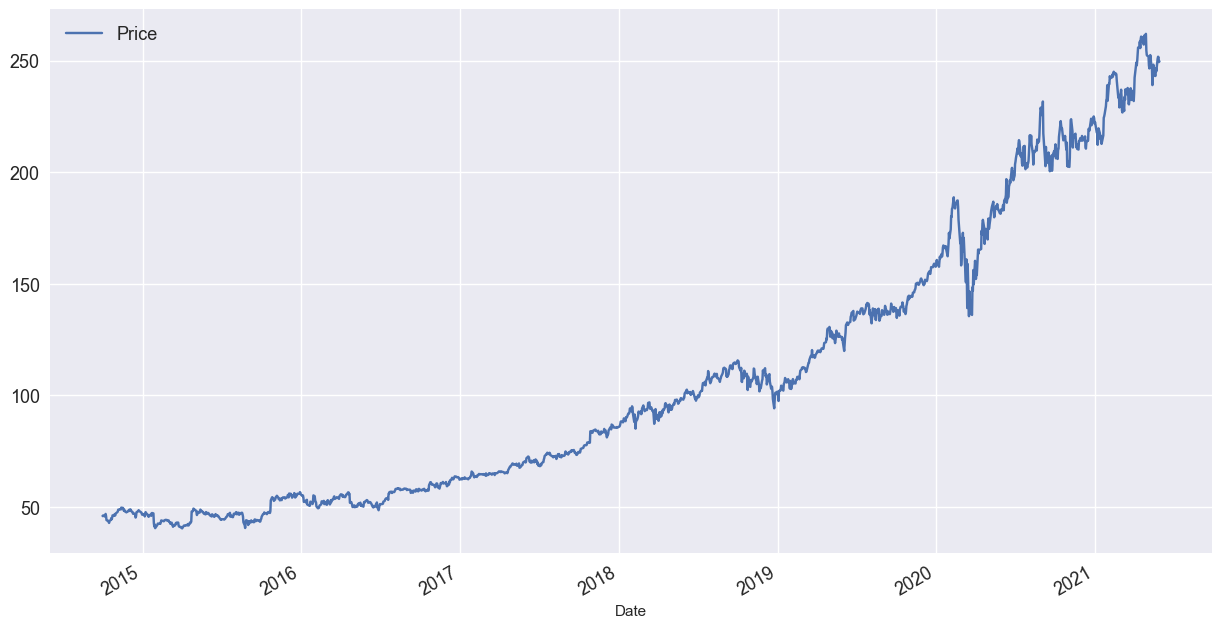

In [61]:
msft.Price.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

- Reward: Positive Returns
- Risk: Volatility of Returns

In [63]:
msft.describe()

,Price,Returns
count,1677.0000,1676.0000
mean,106.3144,0.0012
std,60.7722,0.0173
min,40.2900,-0.1474
25%,54.8300,-0.0062
50%,89.7100,0.0009
75%,138.9000,0.0091
max,261.9700,0.1422


In [65]:
mu = msft.Returns.mean() # arithmetic mean return -> Reward
mu

0.001159781798206695

In [67]:
sigma = msft.Returns.std() # standard deviation of returns -> Risk/Volatility
sigma

0.017256078433477862

In [69]:
np.sqrt(msft.Returns.var())

0.017256078433477862

----------------------------------------

__Coding Challenge #2__

1. Calculate daily returns for Bitcoin.

2. Calculate the arithmetic mean return and the standard deviation of returns for Bitcoin. 

3. Compare Bitcoin with Microsoft (mu = 0.00116, sigma = 0.01726). Does the rule "Higher Risk -> Higher Reward" hold?

-----------------------------------

In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [93]:
btcusd = close['BTC-USD'].to_frame().copy()
btcusd

,Price
Date,
2014-10-01,383.6150
2014-10-02,375.0720
2014-10-03,359.5120
2014-10-04,328.8660
2014-10-05,320.5100
...,...
2021-05-26,39294.1992
2021-05-27,38436.9688
2021-05-28,35697.6055


In [99]:
btcusd['Returns'] = btcusd.Price.pct_change(periods = 1)
btcusd

,Price,Returns
Date,,
2014-10-01,383.6150,NaN
2014-10-02,375.0720,-0.0223
2014-10-03,359.5120,-0.0415
2014-10-04,328.8660,-0.0852
2014-10-05,320.5100,-0.0254
...,...,...
2021-05-26,39294.1992,0.0232
2021-05-27,38436.9688,-0.0218
2021-05-28,35697.6055,-0.0713


In [101]:
btcusd['Returns'].mean()

0.002637756696334039

In [103]:
btcusd['Returns'].std()

0.039120524806292634

## Investment Multiple and CAGR 

__Two alternative reward metrics that are more intuitive and easier to interpret.__

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
#plt.style.use("seaborn-v0_8")

In [107]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

,Price,Returns
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2021-05-24,250.7800,0.0229
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009


__Investment Multiple__: Ending Value of 1 [Dollar] invested. <br>
Multiple = Ending Value / Initial Investment

In [109]:
multiple = (msft.Price.iloc[-1] / msft.Price.iloc[0]) # NEW: use iloc[]
multiple

5.43965107571966

__Price Increase (in %)__

In [111]:
(multiple - 1) * 100

443.96510757196603

In [113]:
msft.Price / msft.Price.iloc[0] # similar/identical concept: Normalized Price with Base Value 1

Date
2014-10-01   1.0000
2014-10-02   0.9969
2014-10-03   1.0041
2014-10-06   1.0041
2014-10-07   0.9919
              ...  
2021-05-24   5.4636
2021-05-25   5.4841
2021-05-26   5.4791
2021-05-27   5.4316
2021-05-28   5.4397
Name: Price, Length: 1677, dtype: float64

__Drawback of Investment Multiple: Doesn´t take into account investment Period. Meaningful only in conjunction with Investment Period.__

__Compound Annual Growth Rate (CAGR)__: The (constant annual) rate of return that would be required for an investment to grow from its beginning balance to its ending balance, assuming the profits were reinvested at the end of each year of the investment's lifespan. (Wikipedia)

In [115]:
start = msft.index[0]
start

Timestamp('2014-10-01 00:00:00')

In [117]:
end = msft.index[-1]
end

Timestamp('2021-05-28 00:00:00')

In [119]:
td = end - start
td

Timedelta('2431 days 00:00:00')

In [121]:
td_years = td.days / 365.25
td_years

6.655715263518139

In [123]:
cagr = multiple**(1 / td_years) - 1 # short version
cagr

0.2897846506194157

In [125]:
cagr = (msft.Price.iloc[-1]/msft.Price.iloc[0])**(1/((msft.index[-1] - msft.index[0]).days / 365.25)) - 1 # long
cagr

0.2897846506194157

In [127]:
(1 + cagr)**(td_years) # alternative #2 to calculate multiple (cagr)

5.439651075719659

__-> CAGR can be used to compare Investments with different investment horizons.__

## Compound Returns & Geometric Mean Return

In [129]:
msft

,Price,Returns
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2021-05-24,250.7800,0.0229
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009


In [133]:
multiple = (1 + msft.Returns).prod() # alternative #3 to calculate multiple (compounding daily returns)
multiple

5.4396510757198575

In [135]:
n = msft.Returns.count()
n

1676

In [137]:
geo_mean = multiple**(1/n) - 1 # Geometric mean return (daily)
geo_mean

0.0010110805580043625

In [139]:
(1 + geo_mean)**n # alternative #4 to calculate multiple (geometric mean)

5.439651075720363

__-> Compound returns, CAGR & geometric mean return are closely related concepts__.

In [141]:
mu = msft.Returns.mean() # arithmetic mean return
mu

0.001159781798206695

__The arithmetic mean return is always greater than the geometric mean return... and less useful__. 

In [143]:
(1 + mu)**n # calculate multiple? not possible with arithmetic mean!

6.977341539401793

----------------------------

__Coding Challenge #3__

1. Calculate Boeing´s Investment Multiple 

2. Calculate Boeing´s CAGR

3. Calculate Boeing´s Geometric Mean Return

4. Calculate Boeing´s Investment Multiple with compound daily returns

----------------------------------

In [153]:
boeing = close['BA'].dropna().to_frame().copy()
boeing.rename(columns = {'BA' : 'Price'},inplace =True)

In [155]:
boeing['Returns'] = boeing['Price'].pct_change(periods = 1)
boeing

,Price,Returns
Date,,
2014-10-01,124.6700,NaN
2014-10-02,124.1700,-0.0040
2014-10-03,126.3600,0.0176
2014-10-06,126.2600,-0.0008
2014-10-07,123.3200,-0.0233
...,...,...
2021-05-24,237.4400,0.0112
2021-05-25,240.7400,0.0139
2021-05-26,241.3700,0.0026


In [157]:
multiple = boeing.Price.iloc[-1]/boeing.Price.iloc[0]
multiple

1.9813909352730892

In [161]:
t = boeing.index[-1] - boeing.index[1]

In [163]:
t = t.days

In [167]:
cagr = multiple ** (1 / t) -1
cagr

0.00028143839908811863

In [169]:
n = boeing['Returns'].count()
geo = (multiple)**(1/n) -1
geo

0.00040807792530195286

## Preview: Simple Returns vs. Logarithmic Returns (log returns)

Very often log returns are used instead of simple returns.<br>
- favourable characteristics of log returns
- drawbacks of simple returns

Problem: Many Students / Practitioners feel uncomfortable with log returns. <br>
-> more detailed background on log returns in the next two Lectures (Discrete vs. Continuous Compounding)

## Discrete Compounding

__Annual Compounding__ -> Interests accrue once a year at the end of the year

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __annual compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account once at the end of each year.__

In [ ]:
PV = 100
r = 0.08
n = 1

In [ ]:
100 * 1.08

In [ ]:
FV = PV * (1 + r)**n
FV

In [ ]:
effective_annual_rate = (FV / PV)**(1/n) - 1 
effective_annual_rate

__Quarterly Compounding__ -> Interests accrue once a quarter at the end of the quarter

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __quarterly compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account at the end of each quarter.__

In [171]:
PV = 100
r = 0.08
n = 1
m = 4

In [173]:
100 * 1.02 * 1.02 * 1.02 * 1.02

108.243216

In [175]:
FV = PV * (1 + r/m)**(n*m)
FV

108.243216

In [177]:
effective_annual_rate = (FV / PV)**(1/n) - 1 
effective_annual_rate

0.08243215999999998

__-> Quarterly compounding is favourable (everything else equal) as we earn compound interest (interest on interest).__

__Monthly Compounding__ -> Interests accrue once a month at the end of the month

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __monthly compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account at the end of each month.__

In [179]:
PV = 100
r = 0.08
n = 1
m = 12

In [181]:
FV = PV * (1 + r/m)**(n*m)
FV

108.29995068075098

In [183]:
effective_annual_rate = ((FV / PV)**(1/n) - 1) 
effective_annual_rate

0.08299950680750978

In [185]:
(1+0.08/12)**12-1

0.08299950680750978

## Continuous Compounding 

In [187]:
import numpy as np

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __continuous compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account continuously (infinitely large number of compounding events).__ -> continuous exponential growth that can be observed in nature

In [ ]:
PV = 100
r = 0.08
n = 1
m = 100000 # approx.infinity

In [ ]:
FV = PV * (1 + r/m)**(n*m) # approx. with large m
FV

In [189]:
FV = PV * np.exp(n * r) # exact math with e (euler number)
FV

108.32870676749586

In [191]:
euler = np.exp(1)
euler

2.718281828459045

In [193]:
PV * euler**(n * r)

108.32870676749586

In [195]:
effective_annual_rate = ((FV / PV)**(1/n) - 1) # Alt 1
effective_annual_rate

0.08328706767495864

In [197]:
effective_annual_rate = np.exp(r) - 1 # Alt 2
effective_annual_rate

0.08328706767495864

Let´s assume we only observe PV and FV, how to calculate the stated rate/continuously compounded rate of 8%?

In [199]:
r = np.log(FV / PV) # inverse calculation -> use log (Alt 1)
r

0.08000000000000007

In [201]:
r = np.log(effective_annual_rate + 1) # inverse calculation -> use log (Alt 2)
r

0.08000000000000007

__Take Home: Prices of traded Financial Instruments change (approx.) continuously. <br>
-> Intuitively, it makes a lot of sense to work with log returns.__ 

## Log Returns

In [203]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.6f}'.format

In [205]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

,Price,Returns
Date,,
2014-10-01,45.900002,NaN
2014-10-02,45.759998,-0.003050
2014-10-03,46.090000,0.007212
2014-10-06,46.090000,0.000000
2014-10-07,45.529999,-0.012150
...,...,...
2021-05-24,250.779999,0.022882
2021-05-25,251.720001,0.003748
2021-05-26,251.490005,-0.000914


In [207]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift()) # daily log returns

In [209]:
msft

,Price,Returns,log_ret
Date,,,
2014-10-01,45.900002,NaN,NaN
2014-10-02,45.759998,-0.003050,-0.003055
2014-10-03,46.090000,0.007212,0.007186
2014-10-06,46.090000,0.000000,0.000000
2014-10-07,45.529999,-0.012150,-0.012225
...,...,...,...
2021-05-24,250.779999,0.022882,0.022624
2021-05-25,251.720001,0.003748,0.003741
2021-05-26,251.490005,-0.000914,-0.000914


In [211]:
msft.describe()

,Price,Returns,log_ret
count,1677.000000,1676.000000,1676.000000
mean,106.314377,0.001160,0.001011
std,60.772246,0.017256,0.017249
min,40.290001,-0.147390,-0.159453
25%,54.830002,-0.006177,-0.006196
50%,89.709999,0.000918,0.000918
75%,138.899994,0.009110,0.009069
max,261.970001,0.142169,0.132929


In [213]:
mu = msft.log_ret.mean() # mean log return -> Reward
mu

0.0010105697603329652

In [215]:
sigma = msft.log_ret.std() # standard deviation of log returns -> Risk/Volatility
sigma

0.01724882682847896

## Simple Returns vs Log Returns ( Part 1)

In [217]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.6f}'.format

In [219]:
df = pd.DataFrame(data = [100, 50, 90], columns = ["Price"])
df

,Price
0,100
1,50
2,90


In [221]:
df["SR"] = df.Price.pct_change() # simple returns

In [223]:
df["LR"] = np.log(df.Price / df.Price.shift()) # log returns

In [225]:
df

,Price,SR,LR
0,100,NaN,NaN
1,50,-0.500000,-0.693147
2,90,0.800000,0.587787


In [229]:
periods = df.SR.count()
periods

2

__The arithmetic mean of simple returns can be misleading!__

In [231]:
mean_sr = df.SR.mean()
mean_sr

0.15000000000000002

In [233]:
100 * (1 + mean_sr)**periods # wrong!!!

132.24999999999997

__We should use Compound Simple Returns / Geometric Mean, or even better...__

In [235]:
geo_mean = (1 + df.SR).prod()**(1 / periods) - 1
geo_mean

-0.05131670194948623

In [237]:
100 * (1 + geo_mean)**periods # correct!!!

89.99999999999999

__...Log Returns which are additive over time!__

In [239]:
sum_lr = df.LR.sum()
sum_lr

-0.10536051565782623

In [241]:
100 * np.exp(sum_lr) # correct!!!

90.0

In [243]:
mean_lr = df.LR.mean()
mean_lr

-0.05268025782891311

In [245]:
100 * np.exp(mean_lr * periods) # correct!!!

90.0

__Take Home: Log Returns are additive over time. Simple Returns are not additive over time (but they can be multiplied/compounded)__

## Simple Returns vs. Log Returns (Part 2)

In [247]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.6f}'.format

In [249]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])

In [251]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift())

In [253]:
msft

,Price,Returns,log_ret
Date,,,
2014-10-01,45.900002,NaN,NaN
2014-10-02,45.759998,-0.003050,-0.003055
2014-10-03,46.090000,0.007212,0.007186
2014-10-06,46.090000,0.000000,0.000000
2014-10-07,45.529999,-0.012150,-0.012225
...,...,...,...
2021-05-24,250.779999,0.022882,0.022624
2021-05-25,251.720001,0.003748,0.003741
2021-05-26,251.490005,-0.000914,-0.000914


__Investment Multiple__

In [255]:
msft.Returns.add(1).prod() # compounding simple returns ("compound returns")

5.4396510757198575

In [257]:
np.exp(msft.log_ret.sum())  # adding log returns ("cumulative returns")

5.439651075719645

__Normalized Prices with Base 1__

In [259]:
msft.Returns.add(1).cumprod() # compounding simple returns ("compound returns")

Date
2014-10-01        NaN
2014-10-02   0.996950
2014-10-03   1.004139
2014-10-06   1.004139
2014-10-07   0.991939
               ...   
2021-05-24   5.463616
2021-05-25   5.484096
2021-05-26   5.479085
2021-05-27   5.431590
2021-05-28   5.439651
Name: Returns, Length: 1677, dtype: float64

In [261]:
np.exp(msft.log_ret.cumsum()) # adding log returns ("cumulative returns")

Date
2014-10-01        NaN
2014-10-02   0.996950
2014-10-03   1.004139
2014-10-06   1.004139
2014-10-07   0.991939
               ...   
2021-05-24   5.463616
2021-05-25   5.484096
2021-05-26   5.479085
2021-05-27   5.431590
2021-05-28   5.439651
Name: log_ret, Length: 1677, dtype: float64

In [263]:
msft.log_ret.cumsum().apply(np.exp) # adding log returns ("cumulative returns")

Date
2014-10-01        NaN
2014-10-02   0.996950
2014-10-03   1.004139
2014-10-06   1.004139
2014-10-07   0.991939
               ...   
2021-05-24   5.463616
2021-05-25   5.484096
2021-05-26   5.479085
2021-05-27   5.431590
2021-05-28   5.439651
Name: log_ret, Length: 1677, dtype: float64

__CAGR__

In [265]:
(msft.Price.iloc[-1]/msft.Price.iloc[0])**(1/((msft.index[-1] - msft.index[0]).days / 365.25)) - 1 # use iloc

0.2897846506194157

In [267]:
trading_days_year = msft.Returns.count() / ((msft.index[-1] - msft.index[0]).days / 365.25)
trading_days_year

251.81365693130397

In [269]:
np.exp(msft.log_ret.mean() * trading_days_year) - 1 # correct with mean of daily log returns!

0.2897846506194153

In [271]:
msft.Returns.mean() * trading_days_year # incorrect with mean of daily simple returns!

0.2920488958487915

In [273]:
np.exp(msft.log_ret.mean() * 252) - 1 # good approximation (for us stocks)

0.29002755628143806

--------------------------------------------

__Coding Challenge #4__

1. Calculate daily log returns for Boeing.

2. Use Boeing´s log returns to calculate 
- Investment Multiple
- CAGR (assuming 252 trading days)
- Normalized Prices (Base = 1)

---------------------------------------------

In [277]:
boeing['log_ret'] = np.log(boeing.Price/boeing.Price.shift())

In [285]:
boeing

,Price,Returns,log_ret
Date,,,
2014-10-01,124.669998,NaN,NaN
2014-10-02,124.169998,-0.004011,-0.004019
2014-10-03,126.360001,0.017637,0.017483
2014-10-06,126.260002,-0.000791,-0.000792
2014-10-07,123.320000,-0.023285,-0.023561
...,...,...,...
2021-05-24,237.440002,0.011157,0.011096
2021-05-25,240.740005,0.013898,0.013803
2021-05-26,241.369995,0.002617,0.002613


In [287]:
multiple = np.exp(boeing['log_ret'].sum())
multiple

1.9813909352730894

In [291]:
t =( boeing.index[-1] - boeing.index[0]).days/365.25
trading_days_year = boeing.Price.count()/t
trading_days_year

251.96390374331548

In [293]:
cagr = np.exp(boeing['log_ret'].mean()*trading_days_year)-1
cagr

0.10826965906874508

In [301]:
norm = boeing['log_ret'].cumsum().apply(np.exp)
norm

Date
2014-10-01        NaN
2014-10-02   0.995989
2014-10-03   1.013556
2014-10-06   1.012754
2014-10-07   0.989171
               ...   
2021-05-24   1.904548
2021-05-25   1.931018
2021-05-26   1.936071
2021-05-27   2.010909
2021-05-28   1.981391
Name: log_ret, Length: 1677, dtype: float64

## Performance Comparison

__General Rule in Finance/Investing: Higher Risk must be rewarded with higher Returns__.

__Which instrument(s) performed best/worst in the past in terms of risk & return?__

In [2]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
#plt.style.use("seaborn-v0_8")

In [4]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,251.4900,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492


In [6]:
close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1677 non-null   float64
 1   BTC-USD   2434 non-null   float64
 2   EURUSD=X  1735 non-null   float64
 3   GC=F      1674 non-null   float64
 4   MSFT      1677 non-null   float64
 5   ^DJI      1677 non-null   float64
dtypes: float64(6)
memory usage: 133.1 KB


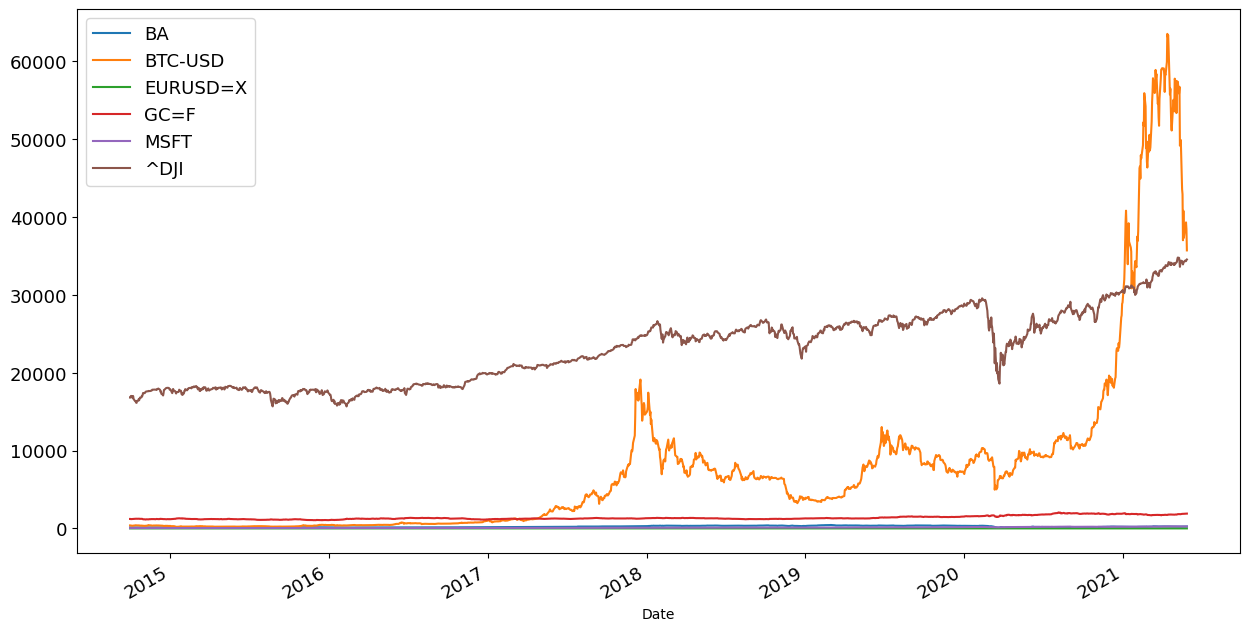

In [12]:
close.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [14]:
np.log(close / close.shift()).info() # keep NaN

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1312 non-null   float64
 1   BTC-USD   2433 non-null   float64
 2   EURUSD=X  1384 non-null   float64
 3   GC=F      1309 non-null   float64
 4   MSFT      1312 non-null   float64
 5   ^DJI      1312 non-null   float64
dtypes: float64(6)
memory usage: 133.1 KB


In [16]:
close.apply(lambda x: np.log(x.dropna() / x.dropna().shift())).info() # remove NaN

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Freq: D
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1676 non-null   float64
 1   BTC-USD   2433 non-null   float64
 2   EURUSD=X  1734 non-null   float64
 3   GC=F      1673 non-null   float64
 4   MSFT      1676 non-null   float64
 5   ^DJI      1676 non-null   float64
dtypes: float64(6)
memory usage: 133.1 KB


In [18]:
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-02,-0.0040,-0.0225,-0.0003,-0.0003,-0.0031,-0.0002
2014-10-03,0.0175,-0.0424,0.0037,-0.0183,0.0072,0.0123
2014-10-04,NaN,-0.0891,NaN,NaN,NaN,NaN
2014-10-05,NaN,-0.0257,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,0.0026,0.0230,0.0028,0.0017,-0.0009,0.0003
2021-05-27,0.0379,-0.0221,-0.0046,-0.0029,-0.0087,0.0041
2021-05-28,-0.0148,-0.0739,0.0000,0.0036,0.0015,0.0019


In [20]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Freq: D
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1676 non-null   float64
 1   BTC-USD   2433 non-null   float64
 2   EURUSD=X  1734 non-null   float64
 3   GC=F      1673 non-null   float64
 4   MSFT      1676 non-null   float64
 5   ^DJI      1676 non-null   float64
dtypes: float64(6)
memory usage: 133.1 KB


In [22]:
returns.describe()

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
count,1676.0000,2433.0000,1734.0000,1673.0000,1676.0000,1676.0000
mean,0.0004,0.0019,-0.0000,0.0003,0.0010,0.0004
std,0.0263,0.0395,0.0051,0.0094,0.0172,0.0120
min,-0.2724,-0.4647,-0.0281,-0.0511,-0.1595,-0.1384
25%,-0.0092,-0.0123,-0.0031,-0.0042,-0.0062,-0.0034
50%,0.0007,0.0020,-0.0000,0.0003,0.0009,0.0007
75%,0.0105,0.0178,0.0029,0.0051,0.0091,0.0054
max,0.2177,0.2251,0.0281,0.0578,0.1329,0.1076


In [24]:
summary = returns.agg(["mean", "std"]).T
summary

,mean,std
BA,0.0004,0.0263
BTC-USD,0.0019,0.0395
EURUSD=X,-0.0000,0.0051
GC=F,0.0003,0.0094
MSFT,0.0010,0.0172
^DJI,0.0004,0.0120


In [26]:
summary.columns = ["Mean", "Std"]
summary

,Mean,Std
BA,0.0004,0.0263
BTC-USD,0.0019,0.0395
EURUSD=X,-0.0000,0.0051
GC=F,0.0003,0.0094
MSFT,0.0010,0.0172
^DJI,0.0004,0.0120


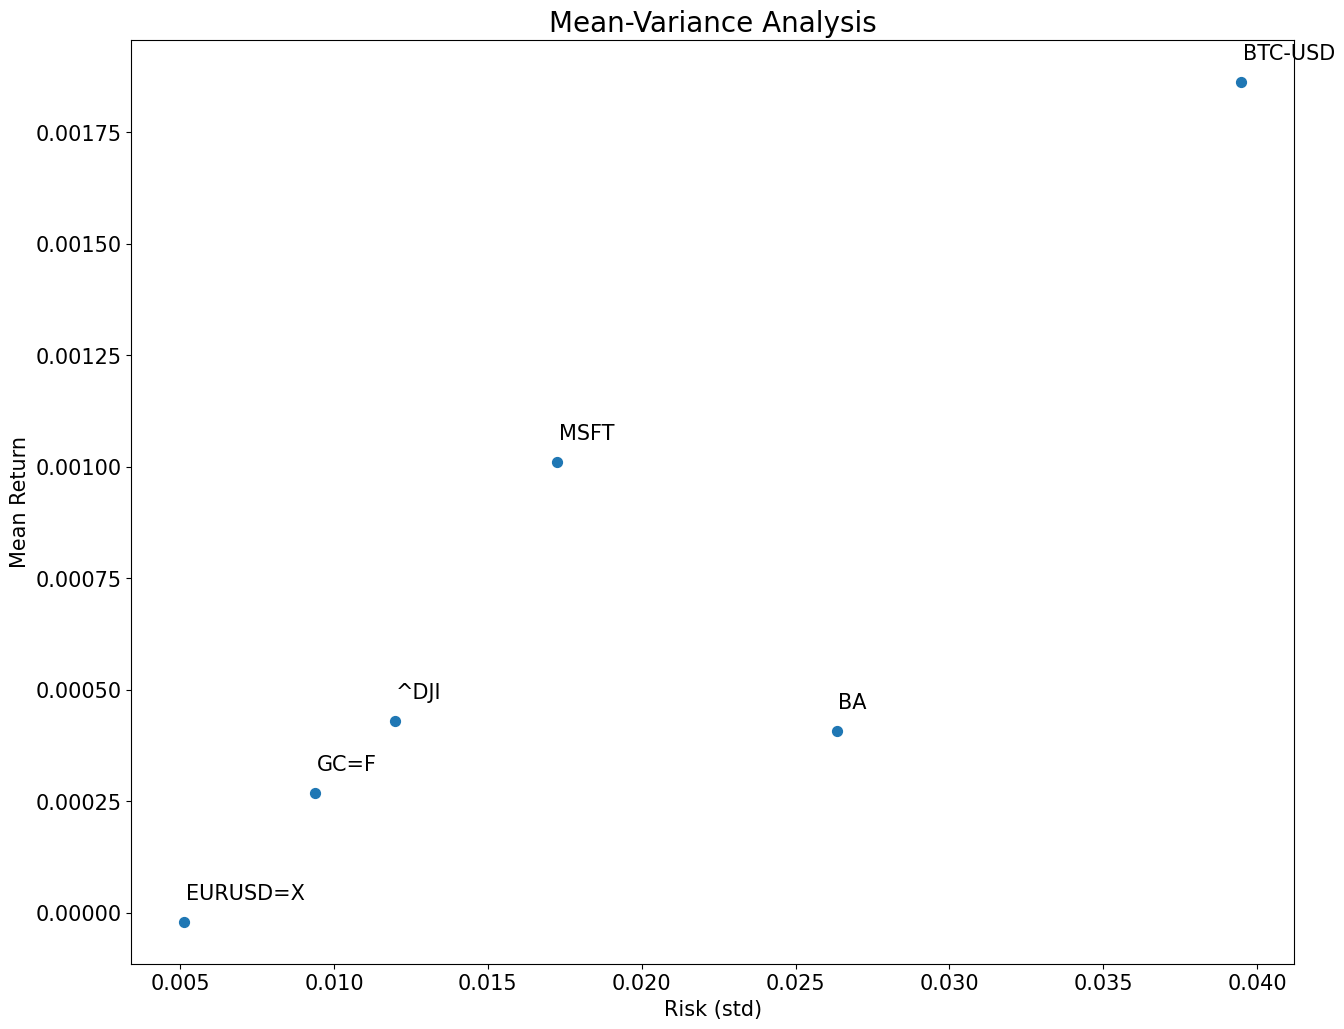

In [28]:
summary.plot(kind = "scatter", x = "Std", y = "Mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Std"]+0.00005, summary.loc[i, "Mean"]+0.00005), size = 15)
plt.xlabel("Risk (std)", fontsize = 15)
plt.ylabel("Mean Return", fontsize = 15)
plt.title("Mean-Variance Analysis", fontsize = 20)
plt.show()

-> There is __no clear "best-performer"__ among ["EURUSD=X", "GC=F", "^DJI", "MSFT", "BTC-USD"] (without further analysis). __Higher risk__ is getting rewarded with __higher returns__. __BA underperformed__.

__Take Home: Mean-Variance Analysis has one major shortcoming: It assumes that financial returns follow a Normal Distribution. That´s (typically) not True.<br> -> Standard Deviation of Returns underestimates the true/full risk of an Investment as it fails to measure "Tail Risks".__ 

## Normality of Financial Returns 

In [30]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
#plt.style.use("seaborn-v0_8")

In [32]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

,Price,Returns
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2021-05-24,250.7800,0.0229
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009


In [34]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift()) 
msft

,Price,Returns,log_ret
Date,,,
2014-10-01,45.9000,NaN,NaN
2014-10-02,45.7600,-0.0031,-0.0031
2014-10-03,46.0900,0.0072,0.0072
2014-10-06,46.0900,0.0000,0.0000
2014-10-07,45.5300,-0.0122,-0.0122
...,...,...,...
2021-05-24,250.7800,0.0229,0.0226
2021-05-25,251.7200,0.0037,0.0037
2021-05-26,251.4900,-0.0009,-0.0009


In [36]:
msft.describe()

,Price,Returns,log_ret
count,1677.0000,1676.0000,1676.0000
mean,106.3144,0.0012,0.0010
std,60.7722,0.0173,0.0172
min,40.2900,-0.1474,-0.1595
25%,54.8300,-0.0062,-0.0062
50%,89.7100,0.0009,0.0009
75%,138.9000,0.0091,0.0091
max,261.9700,0.1422,0.1329


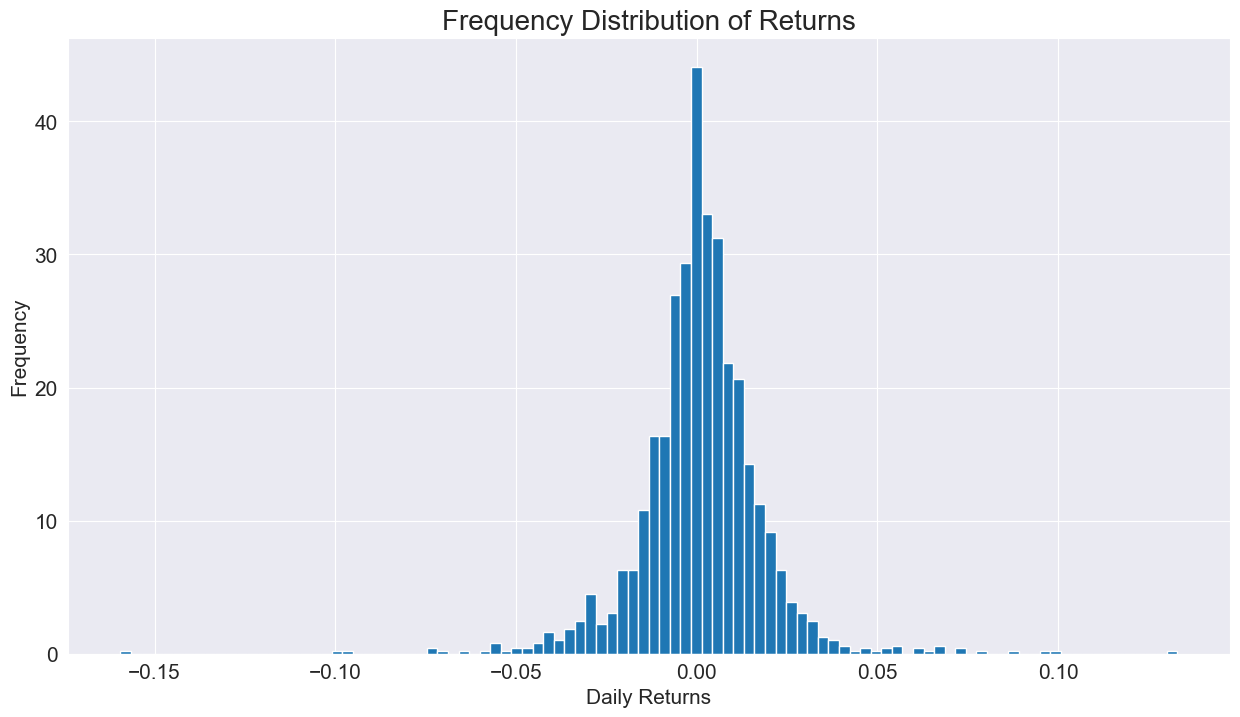

In [48]:
import seaborn as sns
sns.set_style('darkgrid')
msft.log_ret.plot(kind = "hist", figsize = (15 ,8), bins = 100, fontsize = 15, density = True) # Frequency Distribution of log returns
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Frequency Distribution of Returns", fontsize = 20)
plt.show()

__Do MSFT Returns follow a Normal Distribution?__ <br><br>
A normally distributed random variable can be fully described by its 
- mean
- standard deviation

Higher Central Moments are zero:
- Skew = 0 (measures symmetrie around the mean)
- (Excess) Kurtosis = 0 (positve excess Kurtosis -> more observations in the "tails")

In [50]:
mu = msft.log_ret.mean()
mu

0.0010105697603329652

In [52]:
sigma = msft.log_ret.std()
sigma

0.01724882682847896

In [54]:
import scipy.stats as stats

In [56]:
stats.skew(msft.log_ret.dropna()) # in a Normal Distribution: skew == 0

-0.20070528675208313

In [58]:
stats.kurtosis(msft.log_ret.dropna(), fisher = True) # in a Normal Distribution: (fisher) kurtosis == 0

10.733092631202133

__-> MSFT Returns exhibit "Fat Tails" (extreme positive/negative outcomes).__

In [60]:
x = np.linspace(msft.log_ret.min(), msft.log_ret.max(), 10000)
x

array([-0.15945341, -0.15942417, -0.15939493, ...,  0.1328705 ,
        0.13289974,  0.13292898])

In [62]:
y = stats.norm.pdf(x, loc = mu, scale = sigma) # creating y values a for normal distribution with mu, sigma
y

array([3.72735695e-18, 3.78660080e-18, 3.84677524e-18, ...,
       4.72250419e-12, 4.66169105e-12, 4.60164778e-12])

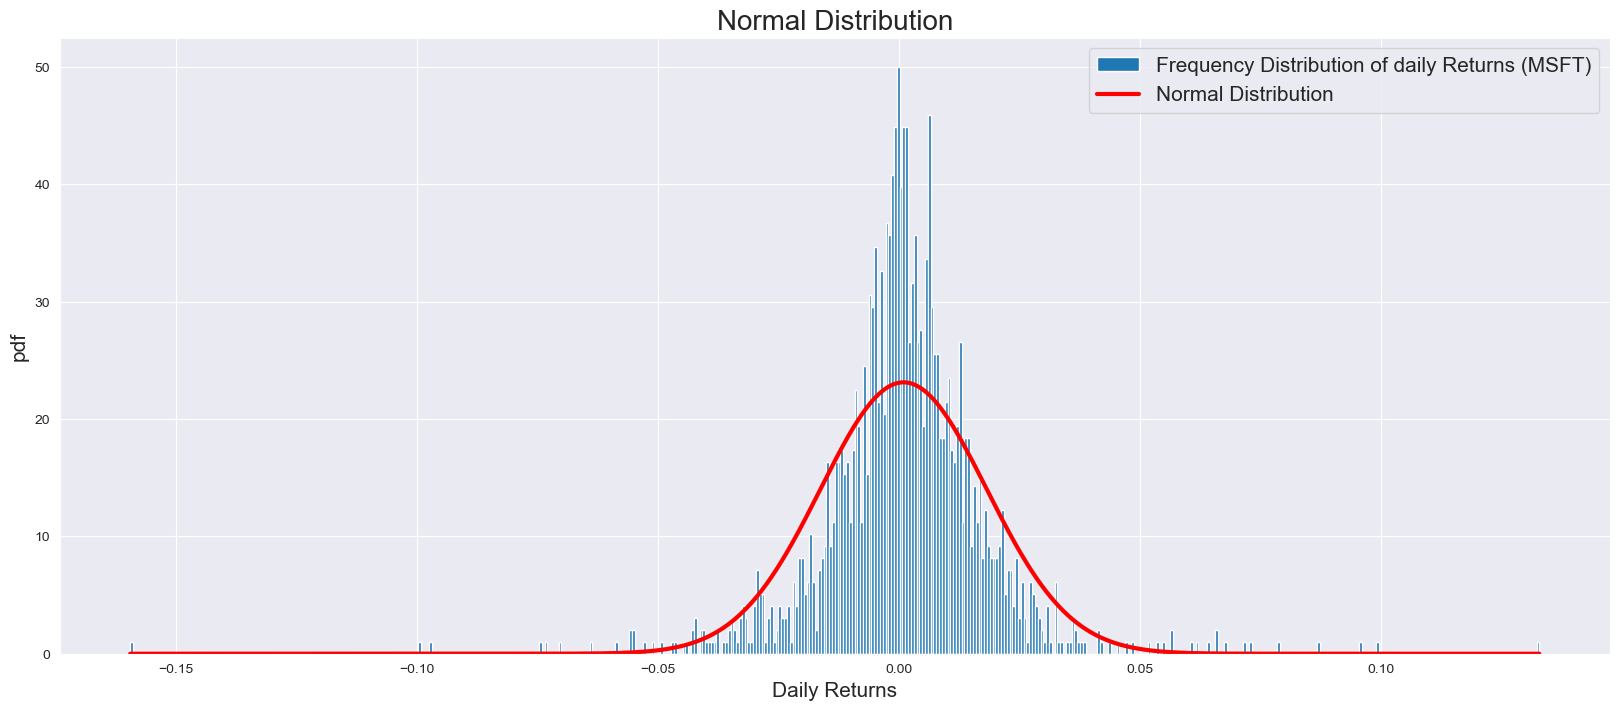

In [64]:
plt.figure(figsize = (20, 8))
plt.hist(msft.log_ret, bins = 500, density = True, label = "Frequency Distribution of daily Returns (MSFT)")
plt.plot(x, y, linewidth = 3, color = "red", label = "Normal Distribution")
plt.title("Normal Distribution", fontsize = 20)
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

__-> MSFT Returns exhibit "Fat Tails" (extreme positive/negative outcomes).__ 

__Testing the normality of MSFT Returns based on the sample (Oct 2014 to May 2021):__ <br>
__-> Hypothesis Test with H0 Hypothesis: MSFT Returns (full population) follow a normal Distribution.__ 

In [66]:
z_stat, p_value = stats.normaltest(msft.log_ret.dropna())

In [72]:
z_stat # high values(2 or 2.5) -> reject H0

326.8451656349759

In [76]:
p_value # low values (close to zero)(less than 0.5) -> reject H0

1.0628551078061005e-71

In [78]:
round(p_value, 10)

0.0

__-> Assuming that MSFT Returns (generally) follow a Normal Distribution, there is 0% probability that we get that extreme outcomes in a sample.__ 

__Take Home: MSFT Returns don´t follow a Normal Distribution as they exhibit "Fat Tails". Extreme Events/Outcomes are not reflected in the Mean-Variance Analysis. The Standard Deviation of Returns underestimates true Risk.__

## Annualizing Mean Return and Std of Returns

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
#plt.style.use("seaborn-v0_8")

In [7]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"], usecols = ["Date", "Price"])

In [9]:
msft

,Price
Date,
2014-10-01,45.900002
2014-10-02,45.759998
2014-10-03,46.090000
2014-10-06,46.090000
2014-10-07,45.529999
...,...
2021-05-24,250.779999
2021-05-25,251.720001
2021-05-26,251.490005


In [11]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift())

In [13]:
msft.log_ret.agg(["mean", "std"]) # mean and std based on daily returns

mean   0.001011
std    0.017249
Name: log_ret, dtype: float64

In [15]:
ann_mu = msft.log_ret.mean() * 252 
ann_mu

0.25466357960390723

In [17]:
cagr = np.exp(ann_mu) - 1 # don´t mix up with cagr
cagr

0.29002755628143806

In [19]:
ann_std = msft.log_ret.std() * np.sqrt(252) 
ann_std

0.27381663717464577

In [21]:
ann_std = np.sqrt(msft.log_ret.var() * 252) # annualized std of returns (Alt 2)
ann_std

0.27381663717464577

## Resampling / Smoothing

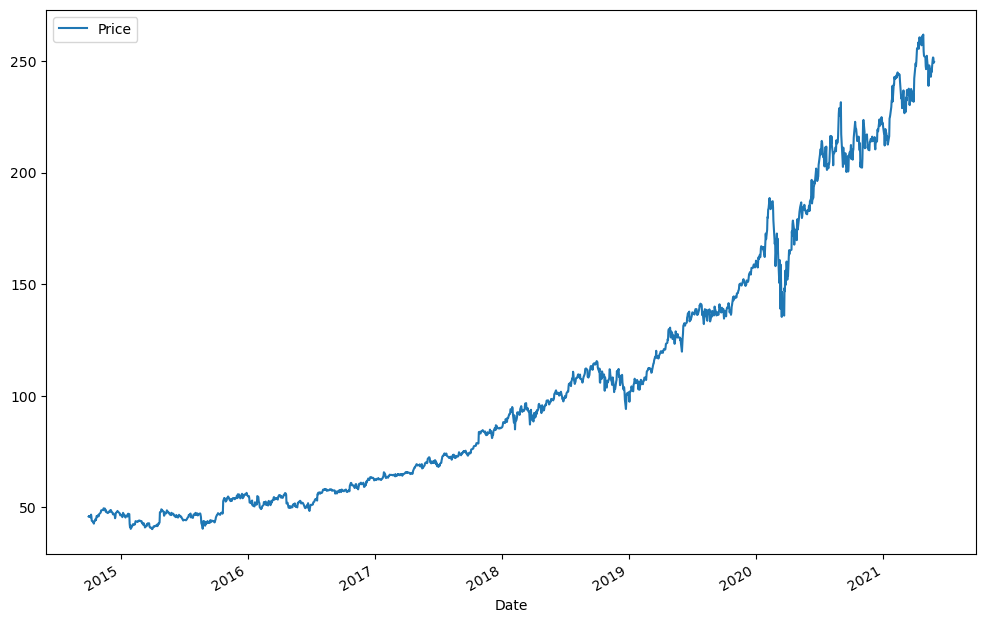

In [23]:
msft.Price.plot(figsize = (12, 8))
plt.legend()
plt.show()

In [25]:
monthly = msft.Price.resample("ME").last() ## resample to monthly (month end)
monthly

Date
2014-10-31    46.950001
2014-11-30    47.810001
2014-12-31    46.450001
2015-01-31    40.400002
2015-02-28    43.849998
                ...    
2021-01-31   231.960007
2021-02-28   232.380005
2021-03-31   235.770004
2021-04-30   252.179993
2021-05-31   249.679993
Freq: ME, Name: Price, Length: 80, dtype: float64

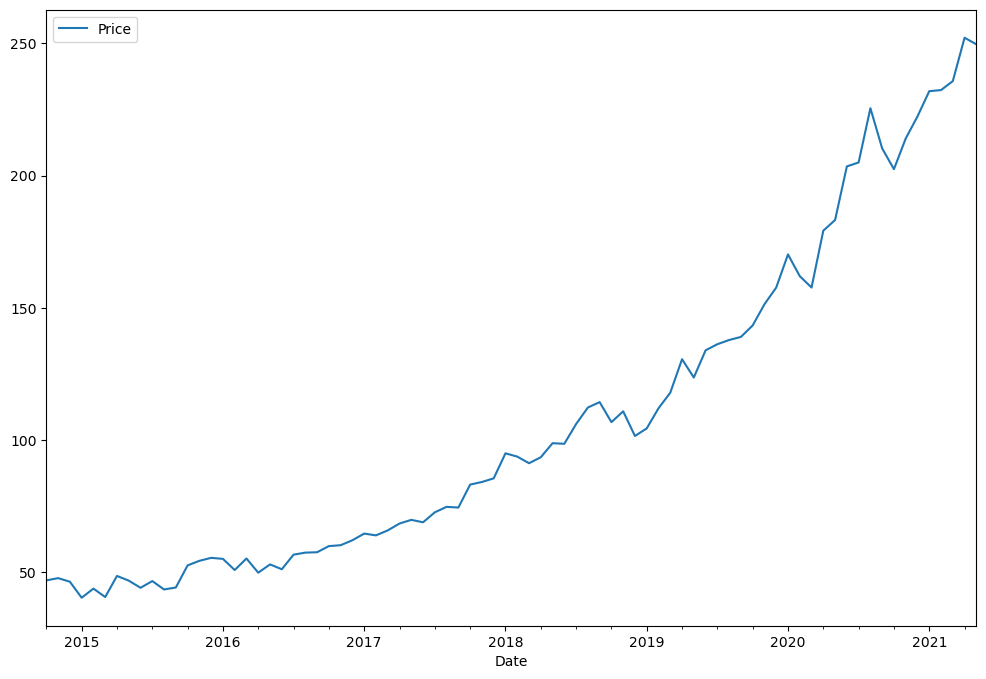

In [27]:
monthly.plot(figsize = (12, 8))
plt.legend()
plt.show()

__How will the Mean-Variance Analysis change with smoothed data?__

In [29]:
freqs = ["YE", "QE", "ME", "W-FRI", "D"]
periods = [1, 4, 12, 52, 252]
ann_mean = []
ann_std = []

In [31]:
for i in range(5):
    resamp = msft.Price.resample(freqs[i]).last() # resample
    ann_mean.append(np.log(resamp / resamp.shift()).mean() * periods[i]) # calc. annualized mean
    ann_std.append(np.log(resamp / resamp.shift()).std() * np.sqrt(periods[i])) # calc. annualized std

In [33]:
ann_mean

[0.24025765527761314,
 0.258739013375891,
 0.253837495704879,
 0.253194152871532,
 0.25289038013157555]

In [41]:
summary = pd.DataFrame(data = {"ann_std":ann_std, "ann_mean":ann_mean}, index = freqs)
summary

,ann_std,ann_mean
YE,0.127250,0.240258
QE,0.179314,0.258739
ME,0.204970,0.253837
W-FRI,0.230859,0.253194
D,0.267372,0.252890


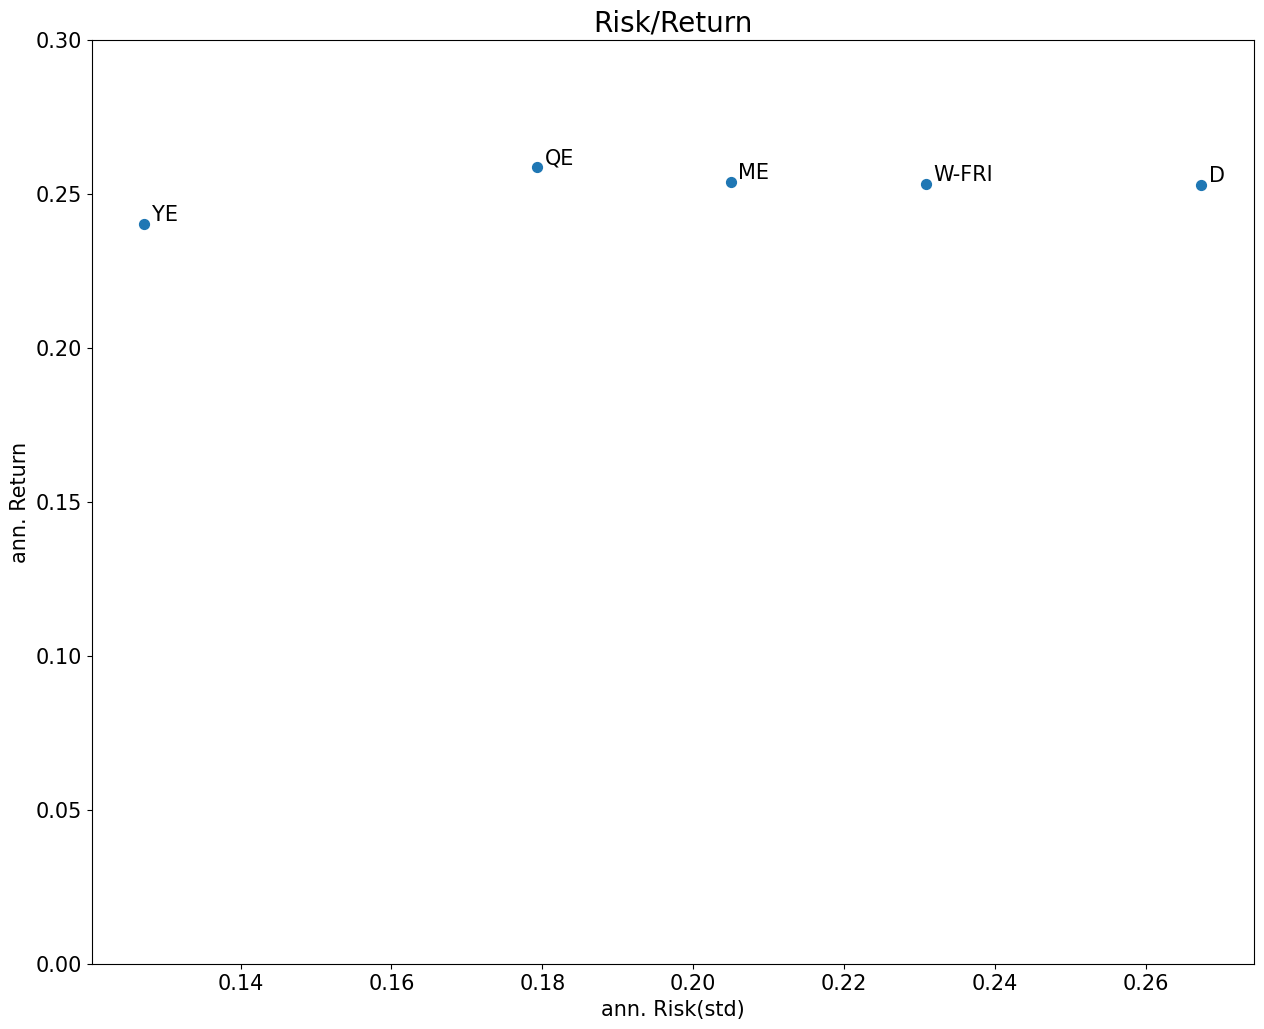

In [37]:
summary.plot(kind = "scatter", x = "ann_std", y = "ann_mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann_std"]+0.001, summary.loc[i, "ann_mean"]+0.001), size = 15)
plt.ylim(0, 0.3)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

__-> Smoothing reduces (observed) Risk__. 

Dubious practices:
- Managing (Manipulating) Performance in Performance Reportings.
- Comparing assets with different granularity and pricing mechanisms -> e.g. non-listed (alternative assets) vs. listed assets 
- Adjusting granularity to investor´s (average) holding period -> Volatility is still there.

## Rolling Statistics

__(Another) general Rule in Finance/Investing: Past performance is not an indicator of future performance__.

In [43]:
msft

,Price,log_ret
Date,,
2014-10-01,45.900002,NaN
2014-10-02,45.759998,-0.003055
2014-10-03,46.090000,0.007186
2014-10-06,46.090000,0.000000
2014-10-07,45.529999,-0.012225
...,...,...
2021-05-24,250.779999,0.022624
2021-05-25,251.720001,0.003741
2021-05-26,251.490005,-0.000914


In [45]:
ann_mu = msft.log_ret.mean() * 252 # annualized mean return
ann_mu

0.25466357960390723

In [47]:
ann_std = msft.log_ret.std() * np.sqrt(252) # annualized std of returns (Alt 1)
ann_std

0.27381663717464577

__Are Return and Risk constant over time? No, of course not! They change over time.__

__Let´s measure/quantify this with rolling statistics!__

In [49]:
window = 252 # rolling window 252 trading days (~ 1 Year)

In [51]:
msft.log_ret.rolling(window = 252)

Rolling [window=252,center=False,axis=0,method=single]

In [53]:
msft.log_ret.rolling(window = 252).sum() # Alt 1

Date
2014-10-01        NaN
2014-10-02        NaN
2014-10-03        NaN
2014-10-06        NaN
2014-10-07        NaN
               ...   
2021-05-24   0.312307
2021-05-25   0.326676
2021-05-26   0.324441
2021-05-27   0.317993
2021-05-28   0.309329
Name: log_ret, Length: 1677, dtype: float64

In [55]:
roll_mean = msft.log_ret.rolling(window = 252).mean() * 252 # Alt 2
roll_mean

Date
2014-10-01        NaN
2014-10-02        NaN
2014-10-03        NaN
2014-10-06        NaN
2014-10-07        NaN
               ...   
2021-05-24   0.312307
2021-05-25   0.326676
2021-05-26   0.324441
2021-05-27   0.317993
2021-05-28   0.309329
Name: log_ret, Length: 1677, dtype: float64

In [57]:
roll_mean.iloc[250:]

Date
2015-09-29         NaN
2015-09-30         NaN
2015-10-01   -0.028507
2015-10-02   -0.004161
2015-10-05    0.011648
                ...   
2021-05-24    0.312307
2021-05-25    0.326676
2021-05-26    0.324441
2021-05-27    0.317993
2021-05-28    0.309329
Name: log_ret, Length: 1427, dtype: float64

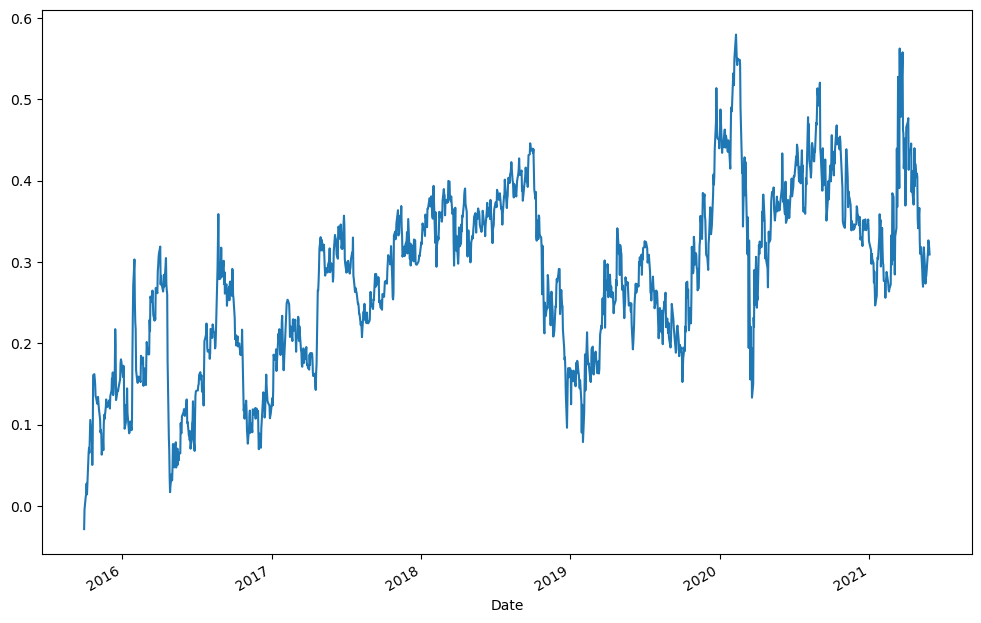

In [59]:
roll_mean.plot(figsize = (12, 8))
plt.show()

In [61]:
roll_std = msft.log_ret.rolling(window = 252).std() * np.sqrt(252)
roll_std

Date
2014-10-01        NaN
2014-10-02        NaN
2014-10-03        NaN
2014-10-06        NaN
2014-10-07        NaN
               ...   
2021-05-24   0.279428
2021-05-25   0.279185
2021-05-26   0.279194
2021-05-27   0.279350
2021-05-28   0.279208
Name: log_ret, Length: 1677, dtype: float64

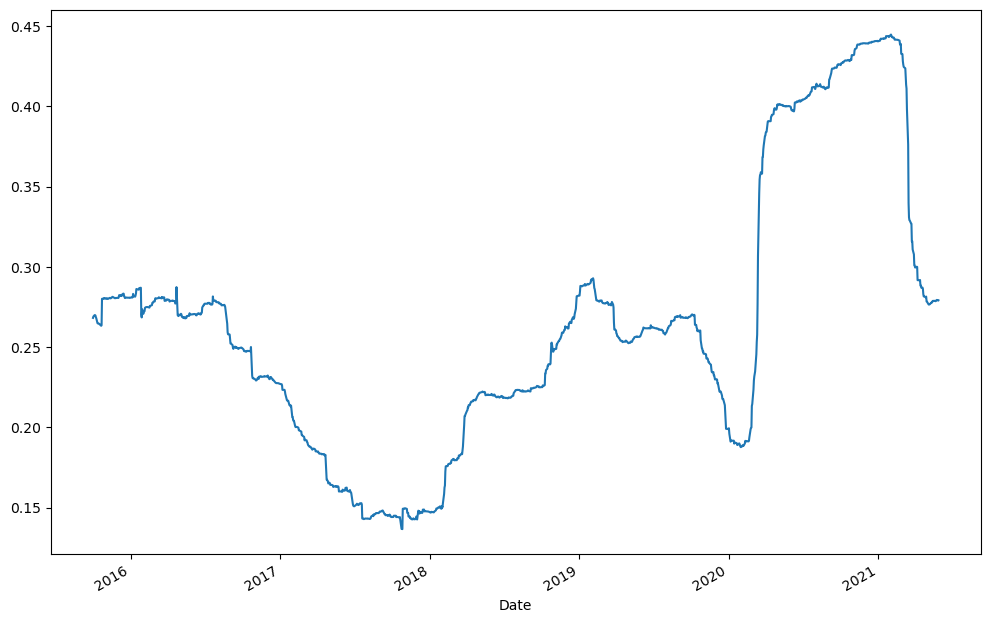

In [63]:
roll_std.plot(figsize = (12, 8))
plt.show()

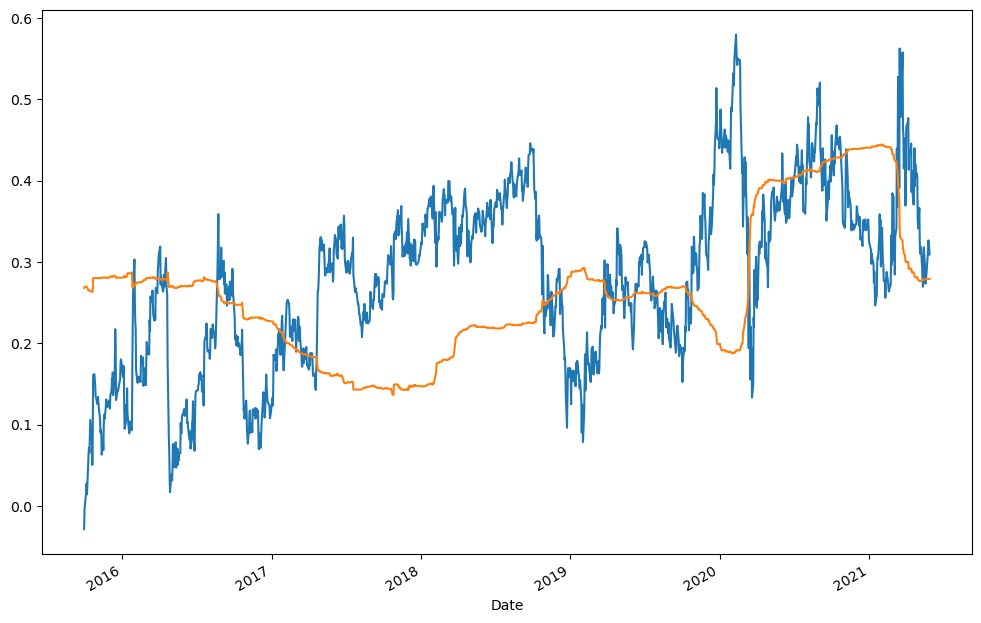

In [65]:
roll_mean.plot(figsize = (12, 8))
roll_std.plot()
plt.show()

__Take Home__: Be careful, you´ll always find (sub-)periods with __low returns & high risk__ and __high returns & low risk__. 

- Analysis Period must be __sufficiently long__ to reduce impact of random noise. <br>
- Analysis Period should be __as short as possible__ and should only include the __latest trends / regimes__.
- Commonly used reporting period: __3 Years / 36 Months__

__Another Example: Simple Moving Average (Prices) - SMA__

In [69]:
sma_window = 50

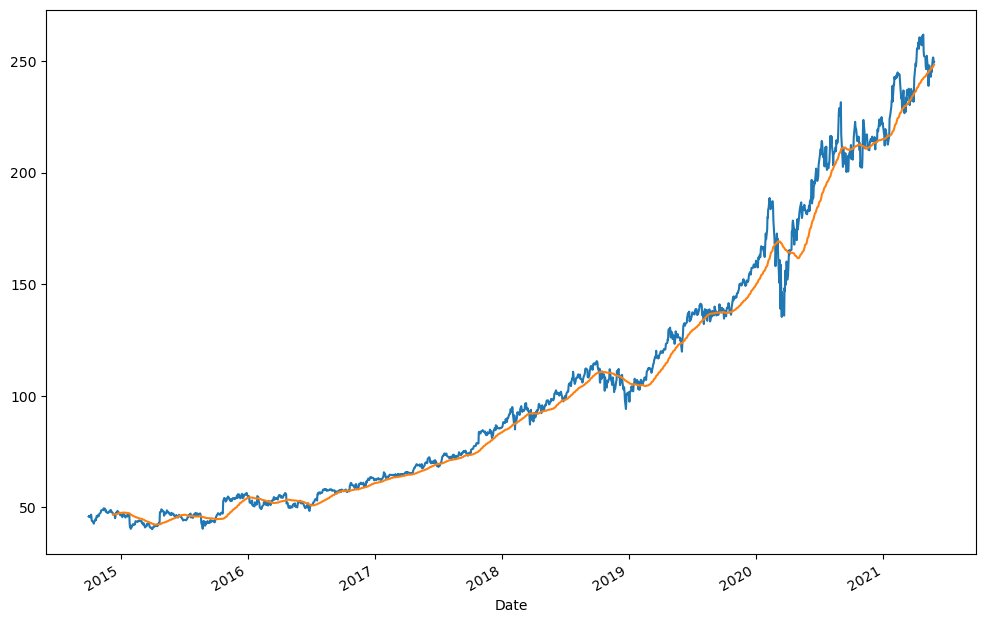

In [71]:
msft.Price.plot(figsize = (12, 8))
msft.Price.rolling(sma_window).mean().plot()
plt.show()

--------------------------------------------

__Coding Challenge #5__

1. Calculate daily log returns for Boeing.

2. Use Boeing´s daily log returns to calculate the annualized mean and annualized std (assume 252 trading days per year).

3. Resample to monthly prices and compare the annualized std (monthly) with the annualized std (daily). Any differences?

4. Keep working with monthly data and calculate/visualize the rolling 36 months mean return (annualized).

---------------------------------------------

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
close = pd.read_csv('close.csv',index_col = 'Date',parse_dates = ['Date'])

In [112]:
ba = close.BA.copy().dropna().to_frame()

In [114]:
ba['log_ret'] = np.log(ba/ ba.shift())
ba

,BA,log_ret
Date,,
2014-10-01,124.669998,NaN
2014-10-02,124.169998,-0.004019
2014-10-03,126.360001,0.017483
2014-10-06,126.260002,-0.000792
2014-10-07,123.320000,-0.023561
...,...,...
2021-05-24,237.440002,0.011096
2021-05-25,240.740005,0.013803
2021-05-26,241.369995,0.002613


In [116]:
ann_mu = ba.log_ret.mean() *252
ann_mu

0.10281466040592156

In [120]:
ann_std = ba.log_ret.std() *np.sqrt(252)
ann_std

0.4181796243706362

In [122]:
monthly = ba.BA.resample('ME').last().to_frame()
monthly

,BA
Date,
2014-10-31,124.910004
2014-11-30,134.360001
2014-12-31,129.979996
2015-01-31,145.369995
2015-02-28,150.850006
...,...
2021-01-31,194.190002
2021-02-28,212.009995
2021-03-31,254.720001


In [124]:
monthly['log_ret'] = np.log(monthly / monthly.shift())


In [128]:
ann_std_month = monthly.log_ret.std() *np.sqrt(12)
ann_std_month

0.4071944262194019

In [130]:
window = 36

In [132]:
roll_mean = monthly.log_ret.rolling(window = window).mean() *12

In [134]:
roll_mean

Date
2014-10-31         NaN
2014-11-30         NaN
2014-12-31         NaN
2015-01-31         NaN
2015-02-28         NaN
                ...   
2021-01-31   -0.200501
2021-02-28   -0.178530
2021-03-31   -0.084161
2021-04-30   -0.117726
2021-05-31   -0.118205
Freq: ME, Name: log_ret, Length: 80, dtype: float64

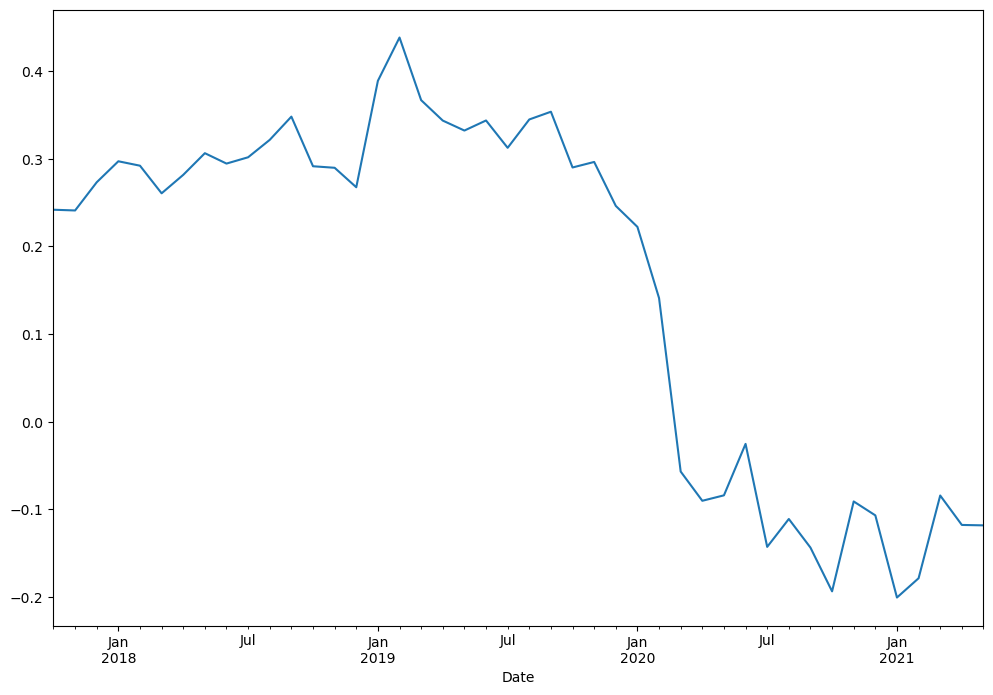

In [138]:
roll_mean.dropna().plot(figsize = (12,8))
plt.show()

## Short Selling / Short Positions (Part 1)

What´s the rational behind short selling an instrument? <br>
__-> making profits/positive returns when prices fall.__

__Stocks Example:__

Today an Investor __buys__ the ABC Stock for USD 100. One day later he __sells__ the stock for USD 110. <br> 
__-> Profit: USD 10__ <br>
->__Long Position__ (benefit from rising prices):

Today an Investor __borrows__ the ABC Stock from another Investor and __sells__ it for USD 100. One day later he __buys__ the stock for USD 90 and __returns__ it to the lender.<br>
__-> Profit: USD 10__  <br>
->__Short Position__ (benefit from falling prices):

In some countries (and for some instruments like stocks) short selling is prohibited. <br>
Most intuitive/popular use case for short selling: __Currencies (Forex)__

## Short Selling / Short Positions (Part 2)

__EUR/USD__ ("Long Euro" == "Short USD")

In [ ]:
t0 = 1.10
t1 = 1.25

Today an Investor __buys__ EUR 1 and pays USD 1.10. One day later he __sells__ EUR 1 for USD 1.25 <br>
__-> Profit: USD 0.15__  <br>
->__Long Position Euro__ (benefit from rising EUR prices):

In [ ]:
t1 / t0 - 1 # The EUR appreciates by 13.64% relative to USD (simple return)

-> EUR __Long__ Position returns __+13.64%__ (simple return) 

What return would you expect for the corresponding EUR __Short__ position? That´s a "no brainer": __-13.64%__, right? 

__Surprisingly, that´s incorrect!!!__

Inverse Rate: __USD/EUR__ ("Short Euro" == "Long USD")

In [ ]:
t0 = 1 / 1.10
t1 = 1 / 1.25

In [ ]:
print(t0, t1)

Today an Investor __buys__ USD 1 and pays 0.9091 Euro. One day later he __sells__ USD 1 for EUR 0.8 __<br>
-> Loss: EUR 0.1091__  <br>

In [ ]:
t1 / t0 - 1 # The USD depreciates by 12.0% relative to EUR

-> EUR __Short__ Position returns __-12.0%__ (simple return)

__Take Home: When using simple returns, long position return != short position return * (-1)__ <br>
__-> Use log returns!__

## Short Selling / Short Positions (Part 3)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
#plt.style.use("seaborn-v0_8")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
close["USDEUR=X"] = 1/close["EURUSD=X"]

In [ ]:
close

In [ ]:
fx = close[["EURUSD=X", "USDEUR=X"]].dropna().copy()

In [ ]:
fx

In [ ]:
fx.plot(figsize = (12,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
simple_ret = fx.pct_change() # simple returns
simple_ret

In [ ]:
simple_ret.add(1).prod() - 1 # compound simple returns

__-> For simple returns: long position returns != short position returns * (-1)__

In [ ]:
log_ret = np.log(fx / fx.shift()) # log returns
log_ret

In [ ]:
log_ret.sum() # cumulative log returns

__-> For log returns: long position returns == short position returns * (-1)__

In [ ]:
norm_fx = log_ret.cumsum().apply(np.exp) # normalized prices (Base 1)
norm_fx

In [ ]:
norm_fx.iloc[0] = [1, 1]

In [ ]:
norm_fx

In [ ]:
norm_fx.plot(figsize = (12,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

--------------------------------------------

__Coding Challenge #6__

1. Calculate daily log returns for Boeing.

2. Calculate the annualized mean and annualized std (assume 252 trading days per year) for a short position in Boeing (ignore Trading and Borrowing Costs).

---------------------------------------------

## Covariance and Correlation

Do instruments/assets __move together__ (and to what extent)? <br>

Three cases:
- unrelated (__no__ relationship/correlation)
- moving together (__positive__ relationship/correlation)
- moving in opposite directions (__negative__ relationship/correlation) 

__-> Correlation between instruments/assets play an important role in portfolio management.__

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
#plt.style.use("seaborn-v0_8")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
close["USDEUR=X"] = 1/close["EURUSD=X"]
close

In [ ]:
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

In [ ]:
returns.cov() # covariance (hard to interpret)

In [ ]:
returns.corr() # correlation coefficient (easy to interpret)

Three cases:
- no correlation: __correlation coefficient == 0__
- moving together: __0 < correlation coefficient <= 1__ (positive)
- moving in opposite directions: __-1 <= correlation coefficient < 0__ (negative)

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(returns.corr(), cmap = "RdYlBu_r", annot = True, annot_kws={"size":15}, vmin = -1, vmax = 1)
plt.show()

__Take Home: Similar assets are (highly) positive correlated. Different assets exhibit low/no/negative correlation.__ <br>
-> In portfolio management it´s beneficial to have assets with low/no/negative correlation (portfolio diversification effect).

## Portfolio of Assets and Portfolio Returns

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
prices = pd.DataFrame(data = {"Asset_A": [100, 112], "Asset_B":[100, 104]}, index = [0, 1])
prices

In [ ]:
prices["Total"] = prices.Asset_A + prices.Asset_B

In [ ]:
prices

In [ ]:
returns = prices.pct_change() # simple returns
returns

In [ ]:
0.5 * 0.12 + 0.5 * 0.04 # correct (portfolio return == weighted average of simple returns)

In [ ]:
log_returns = np.log(prices / prices.shift()) # log returns
log_returns

In [ ]:
0.5 * log_returns.iloc[1,0] + 0.5 * log_returns.iloc[1,1] # incorrect (portfolio return != weighted average of log returns)

__Take Home: While log returns are time-additive, they are not asset-additive.__ <br>
(While simple returns are not time-additive, they are asset-additive.)

## Margin Trading & Levered Returns (Part 1)

__Definition__: "Margin trading refers to the practice of using __borrowed funds__ from a broker to trade a financial asset, which forms the collateral for the loan from the broker." (Investopedia.com) 

In Simple Words: Investors __don´t pay the full price__ but they get the full benefit (less borrowing costs).

It´s a two edged sword: Leverage __amplifies both gains and losses__. <br> In the event of a loss, the collateral gets reduced and the Investor either posts additional margin or the brokers closes the position.

__Example__

A Trader buys a stock (stock price: 100) __on margin (50%)__. After one day the price increases to 110.<br>
Calculate __unlevered return__ and __levered return__.

In [ ]:
P0 = 100
P1 = 90
leverage = 2
margin = P0/2

In [ ]:
margin

In [ ]:
unlev_return = (P1 - P0) / P0 # simple return
unlev_return

In [ ]:
lev_return = (P1 - P0) / margin # simple return 
lev_return

In [ ]:
lev_return == unlev_return * leverage # this relationship is true for simple returns...

In [ ]:
unlev_return = np.log((P1 - P0) / P0 + 1) # log return
unlev_return

In [ ]:
lev_return = np.log((P1 - P0) / margin + 1) # log return
lev_return

In [ ]:
lev_return == unlev_return * leverage # this relationship does not hold for log returns...

__Take Home: To calculate levered returns, don´t multiply leverage with log returns!__

## Margin Trading & Levered Returns (Part 2)

__Hypothesis: For (highly) profitable Investment: The more leverage, the better?__

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
#plt.style.use("seaborn-v0_8")

In [ ]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

In [ ]:
msft["Simple_Ret"] = msft.Price.pct_change() # simple returns

In [ ]:
leverage = 2

(Simplified) __Assumptions__:
- Restore leverage on a daily basis (by buying/selling shares)
- no trading costs
- no borrowing costs

In [ ]:
msft["Lev_Returns"] = msft.Returns.mul(leverage) # levered simple returns
msft

In [ ]:
msft["Lev_Returns"] = np.where(msft["Lev_Returns"] < -1, -1, msft["Lev_Returns"])

In [ ]:
msft

In [ ]:
msft[["Returns", "Lev_Returns"]].add(1).cumprod().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
msft.Simple_Ret.max()

In [ ]:
msft.Lev_Returns.max()

In [ ]:
msft.Simple_Ret.min()

In [ ]:
msft.Lev_Returns.min()

__What happens when leverage greater than...?__

In [ ]:
-1 / msft.Simple_Ret.min()

__Take Home:__
1. With Leverage you can (theoretically) __lose more than the initial Margin__ (in practice: margin call / margin closeout before)
2. Even for (highly) profitable instruments: __"The more leverage the better" does not hold__.
3. It´s a two edged (__non-symmetrical__) sword: __Leverage amplifies losses more than it amplifies gains__.

--------------------------------

__Coding Challenge #7__

1. Calculate levered returns for Bitcoin (leverage = 4). 

2. Visualize and compare with unlevered Investment.

3. Some Traders trade Bitcoin with extremely high leverage (> 100). Do you think this is a good idea (assuming no additional/advanced Risk Management Tools)?

---------------------------------------------

--------------------------------------

## Coding Challenge Solutions

__Coding Challenge #1__

1. Load Stock Price Data for General Electric (GE) and another ticker symbol of your choice from 2015-01-02 until 2020-12-31.<br>
Go to https://finance.yahoo.com/ and get the right ticker symbol. For instruments traded outside the US, you have to add a country/exchange suffix. <br>
Check the suffix list here https://help.yahoo.com/kb/exchanges-data-providers-yahoo-finance-sln2310.html As an example, the suffix for the National Indian Stock Exchange is .NS -> Ticker Symbol for Reliance is Reliance.NS

2. Select Close prices only and create a price chart for GE.

3. Normalize the stock prices for GE and the Ticker Symbol of your choice (Base Value: 1) and visualize! What´s the final normalized price for GE on 2020-12-30? 

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
#plt.style.use("seaborn-v0_8")

In [3]:
start = "2015-01-02"
end = "2020-12-31"
symbol = ["GE", "Reliance.NS"]

In [5]:
df = yf.download(symbol, start, end)
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


Price         Close                 High                  Low              \
Ticker           GE RELIANCE.NS       GE RELIANCE.NS       GE RELIANCE.NS   
Date                                                                        
2015-01-02 103.1645    187.0456 104.8111    189.2635 102.3823    186.7816   
2015-01-05 101.2708    184.9968 102.9586    188.1757 100.9414    184.6272   
2015-01-06  99.0889    176.6008 101.1473    184.3948  98.5126    175.7348   
2015-01-07  99.1301    180.4450 100.4063    181.3955  98.7184    176.7909   
2015-01-08 100.3239    177.8576 100.3651    182.2615  99.3359    177.4563   
...             ...         ...      ...         ...      ...         ...   
2020-12-23  53.2134    875.8555  53.8013    879.2799  52.0374    865.4021   
2020-12-24  52.1844    898.5196  53.1644    900.6147  52.0374    876.7792   
2020-12-28  52.1354    902.6424  52.8214    909.2659  51.8414    899.0378   
2020-12-29  51.7434    896.6722  52.7724    906.6976  51.6454    893.2929   
2020-12-30  52.4784    899.1277  53.1644    904.3995  51.6944    890.1387   

Price          Open                    Volume                
Ticker           GE RELIANCE.NS            GE   RELIANCE.NS  
Date                                                         
2015-01-02 104.3171    187.5842  8538620.0000  7331366.0000  
2015-01-05 102.9586    186.9295  8770735.0000 10103941.0000  
2015-01-06 100.6944    183.7612 13304295.0000 18627980.0000  
2015-01-07  99.6653    176.8121  9106535.0000 20720312.0000  
2015-01-08 100.1181    181.6701  9019294.0000 19872227.0000  
...             ...         ...           ...           ...  
2020-12-23  52.3314    869.6150 12139419.0000 19501410.0000  
2020-12-24  53.1644    877.2748  6029070.0000 20776988.0000  
2020-12-28  52.4294    904.1744 10793588.0000 17221499.0000  
2020-12-29  52.2334    905.2107 10640944.0000 18611939.0000  
2020-12-30  51.8414    899.0151 10156427.0000 22043630.0000  

[1552 rows x 10 columns]

In [7]:
close = df.Close.copy()
close

Ticker,GE,RELIANCE.NS
Date,,
2015-01-02,103.1645,187.0456
2015-01-05,101.2708,184.9968
2015-01-06,99.0889,176.6008
2015-01-07,99.1301,180.4450
2015-01-08,100.3239,177.8576
...,...,...
2020-12-23,53.2134,875.8555
2020-12-24,52.1844,898.5196
2020-12-28,52.1354,902.6424


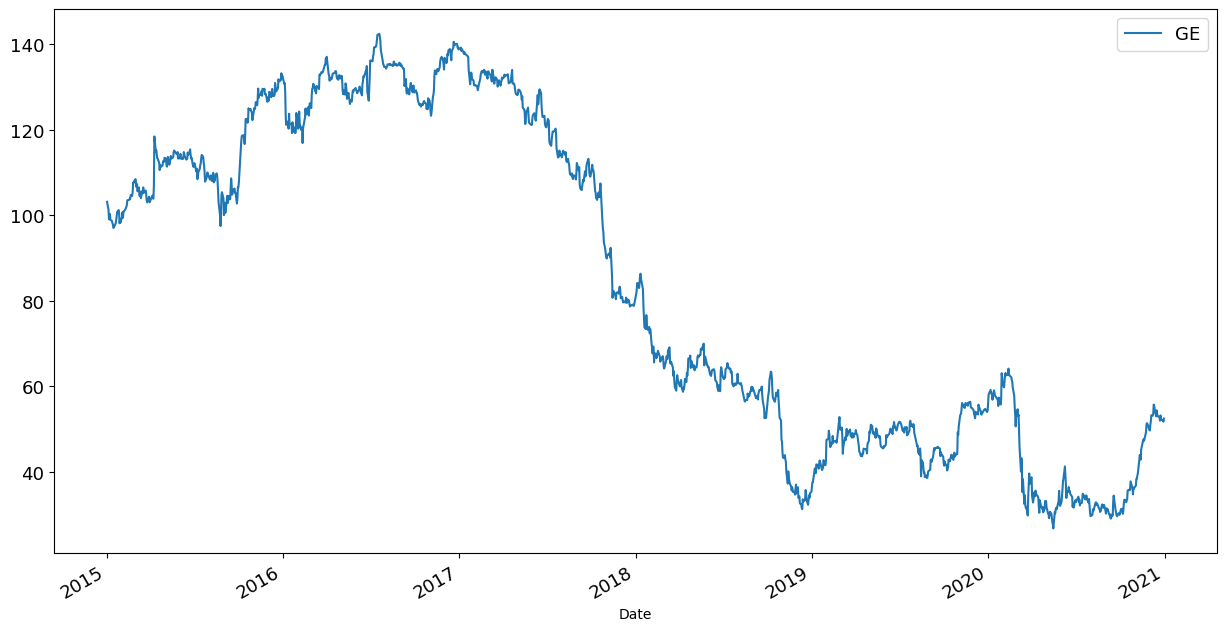

In [9]:
close.GE.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [11]:
norm = close.div(close.iloc[0]).mul(1)
norm

Ticker,GE,RELIANCE.NS
Date,,
2015-01-02,1.0000,1.0000
2015-01-05,0.9816,0.9890
2015-01-06,0.9605,0.9442
2015-01-07,0.9609,0.9647
2015-01-08,0.9725,0.9509
...,...,...
2020-12-23,0.5158,4.6826
2020-12-24,0.5058,4.8037
2020-12-28,0.5054,4.8258


-> The final normalized Price is 0.4445.

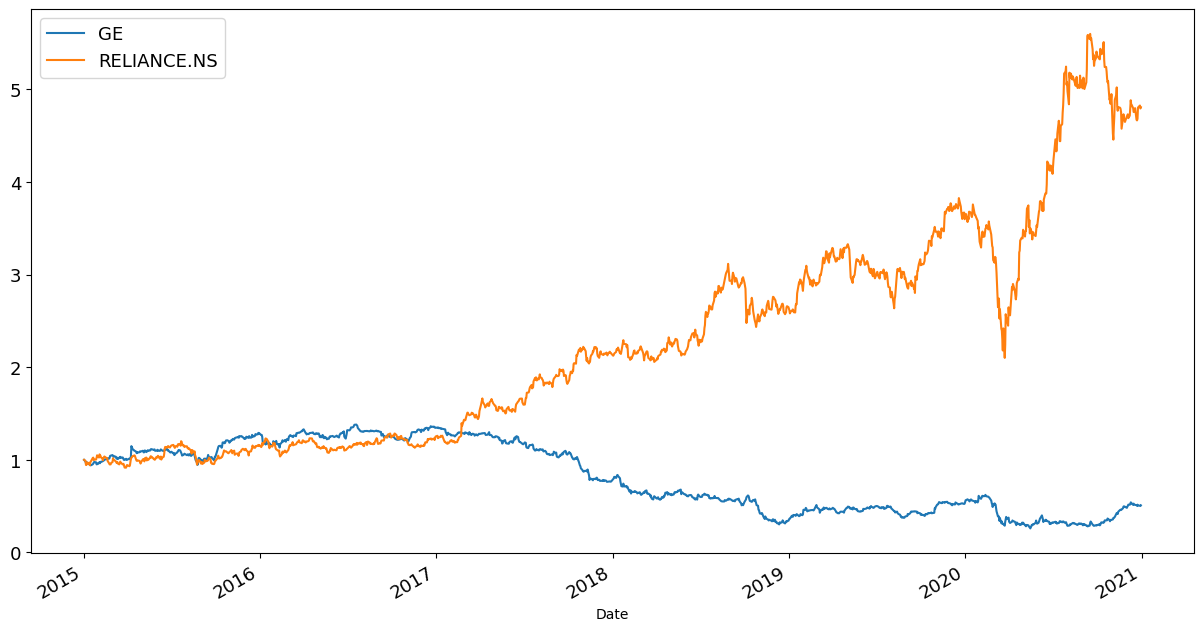

In [13]:
norm.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

__Coding Challenge #2__

1. Calculate daily returns for Bitcoin.

2. Calculate the arithmetic mean return and the standard deviation of returns for Bitcoin. 

3. Compare Bitcoin with Microsoft (mu = 0.00116, sigma = 0.01726). Does the rule "Higher Risk -> Higher Reward" hold?

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
btc = close["BTC-USD"].dropna().to_frame().copy()
btc

In [ ]:
btc["Returns"] = btc.pct_change(periods = 1)
btc

In [ ]:
btc

In [ ]:
mu = btc.Returns.mean() 
mu

In [ ]:
sigma = btc.Returns.std()
sigma

In [ ]:
mu > 0.00116

In [ ]:
sigma > 0.01726

Does the rule "Higher Risk -> Higher Reward" hold? -> Yes

__Coding Challenge #3__

1. Calculate Boeing´s Investment Multiple 

2. Calculate Boeing´s CAGR

3. Calculate Boeing´s Geometric Mean Return

4. Calculate Boeing´s Investment Multiple with compound daily returns

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
ba = close["BA"].dropna().to_frame().copy()
ba

In [ ]:
ba["Returns"] = ba.pct_change(periods = 1)
ba

In [ ]:
multiple = ba.BA.iloc[-1] / ba.BA.iloc[0]
multiple

In [ ]:
cagr = (ba.BA.iloc[-1]/ba.BA.iloc[0])**(1/((ba.index[-1] - ba.index[0]).days / 365.25)) - 1 
cagr

In [ ]:
n = ba.Returns.count()
n

In [ ]:
geo_mean = (1 + ba.Returns).prod()**(1/n) - 1 
geo_mean

In [ ]:
multiple = ba.Returns.add(1).prod()
multiple

__Coding Challenge #4__

1. Calculate daily log returns for Boeing.

2. Use Boeing´s log returns to calculate 
- Investment Multiple
- CAGR (assuming 252 trading days)
- Normalized Prices (Base = 1)

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
#plt.style.use("seaborn-v0_8")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
ba = close["BA"].dropna().to_frame().copy()
ba

In [ ]:
ba["log_ret"] = np.log(ba / ba.shift())
ba

In [ ]:
multiple = np.exp(ba.log_ret.sum())
multiple

In [ ]:
cagr = np.exp(ba.log_ret.mean() * 252) - 1
cagr

In [ ]:
norm = ba.log_ret.cumsum().apply(np.exp)
norm

__Coding Challenge #5__

1. Calculate daily log returns for Boeing.

2. Use Boeing´s daily log returns to calculate the annualized mean and annualized std (assume 252 trading days per year).

3. Resample to monthly prices and compare the annualized std (monthly) with the annualized std (daily). Any differences?

4. Keep working with monthly data and calculate/visualize the rolling 36 months mean return (annualized).

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
#plt.style.use("seaborn-v0_8")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
ba = close["BA"].dropna().to_frame().copy()
ba

In [ ]:
ba["log_ret"] = np.log(ba / ba.shift())
ba

In [ ]:
ann_mu = ba.log_ret.mean() * 252 
ann_mu

In [ ]:
ann_std = ba.log_ret.std() * np.sqrt(252) 
ann_std

In [ ]:
monthly = ba.BA.resample("ME").last().to_frame()
monthly

In [ ]:
monthly["Returns"] = np.log(monthly / monthly.shift())
monthly

In [ ]:
ann_std = monthly.Returns.std() * np.sqrt(12) 
ann_std

-> Risk (monthly) slighly lower than Risk (daily) 

In [ ]:
window = 36

In [ ]:
roll_mean = monthly.Returns.rolling(window = window).mean() * 12
roll_mean

In [ ]:
roll_mean.plot(figsize = (12, 8))
plt.show()

__Coding Challenge #6__

1. Calculate daily log returns for Boeing.

2. Calculate the annualized mean and annualized std (assume 252 trading days per year) for a short position in Boeing (ignore Trading and Borrowing Costs).

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
#plt.style.use("seaborn-v0_8")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
ba = close["BA"].dropna().to_frame().copy()
ba

In [ ]:
ba["log_ret"] = np.log(ba / ba.shift())
ba

In [ ]:
ba["short"] = ba.log_ret * (-1)
ba

In [ ]:
ann_mean = ba.short.mean() * 252 # equal to ann_mean of long position * (-1)
ann_mean

In [ ]:
ann_std = ba.short.std() * np.sqrt(252) # same as ann_std of long position
ann_std

__Coding Challenge #7__

1. Calculate levered returns for Bitcoin (leverage = 4). 

2. Visualize and compare with unlevered Investment.

3. Some Traders trade Bitcoin with extremely high leverage (> 100). Do you think this is a good idea (assuming no additional/advanced Risk Management Tools)?

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
#plt.style.use("seaborn-v0_8")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
btc = close["BTC-USD"].dropna().to_frame().copy()
btc

In [ ]:
btc["Returns"] = btc.pct_change(periods = 1)
btc

In [ ]:
leverage = 4

In [ ]:
btc["Lev_Returns"] = btc.Returns.mul(leverage) # levered simple returns
btc

In [ ]:
btc["Lev_Returns"] = np.where(btc["Lev_Returns"] < -1, -1, btc["Lev_Returns"])

In [ ]:
btc[["Returns", "Lev_Returns"]].add(1).cumprod().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

-> Trading Bitcoin with (high) leverage requires advanced risk monitoring/management. Otherwise, a complete loss is very likely (sooner or later...).